In [27]:
import cv2
import random
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

from PIL import Image

In [28]:
def add_noise(image_path, output_path, noise_density=0.05):
    # Open the image
    image = Image.open(image_path)
    width, height = image.size

    # Create a new image with the same size
    noisy_image = Image.new(image.mode, (width, height))

    # Add salt-and-pepper noise
    for i in range(width):
        for j in range(height):
            if random.random() < noise_density:
                if random.random() < 0.5:
                    noisy_image.putpixel((i, j), (0, 0, 0)) # black pixel
                else:
                    noisy_image.putpixel((i, j), (255, 255, 255)) # white pixel
            else:
                noisy_image.putpixel((i, j), image.getpixel((i, j)))

    # Save the noisy image
    noisy_image.save(output_path)

In [29]:
def median_filter(data, filter_size):
    indexer = filter_size // 2
    output = [[0 for _ in range(len(data[0]))] for _ in range(len(data))]
    for i in range(len(data)):
        for j in range(len(data[0])):
            temp = []
            for z in range(filter_size):
                for k in range(filter_size):
                    if i + z - indexer >= 0 and i + z - indexer < len(data) and j + k - indexer >= 0 and j + k - indexer < len(data[0]):
                        temp.append(data[i + z - indexer][j + k - indexer])
            temp.sort()
            output[i][j] = temp[len(temp) // 2]
    return output

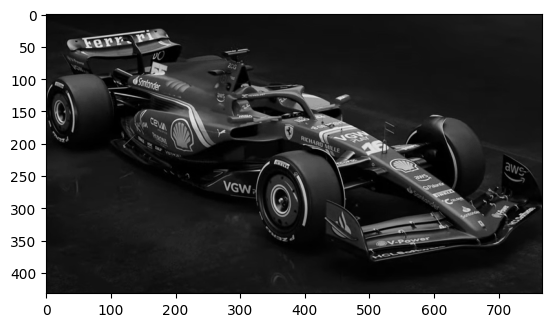

In [30]:
# Load the image
image = cv2.imread('ferrari-f1.png',0)
plt.imshow(image,cmap='gray')

In [31]:
add_noise(image_path='ferrari-f1.png', output_path='noise_ferrari-f1.png', noise_density=0.05)

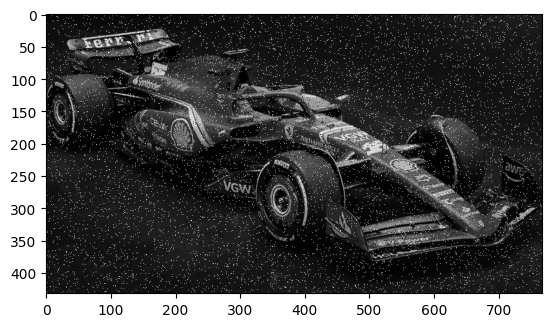

In [32]:
# Load the image with noise
image = cv2.imread('noise_ferrari-f1.png',0)
plt.imshow(image,cmap='gray')

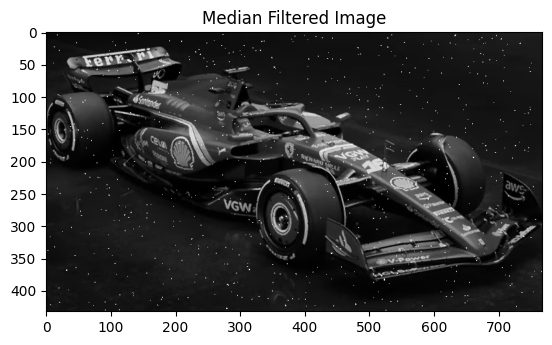

In [33]:
m_filtered_image = median_filter(image, filter_size=2)
#===============
plt.imshow(m_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.show()

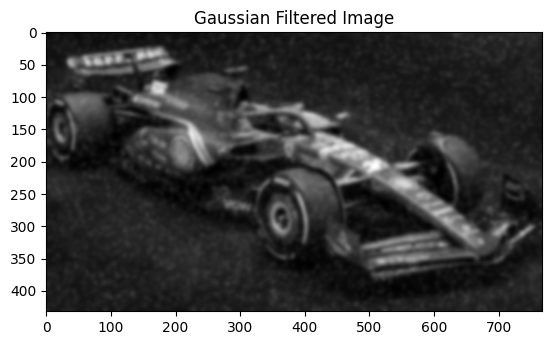

In [41]:
from scipy import ndimage

g_filtered_image = ndimage.gaussian_filter(image, sigma=3)
#=================
plt.imshow(g_filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.show()


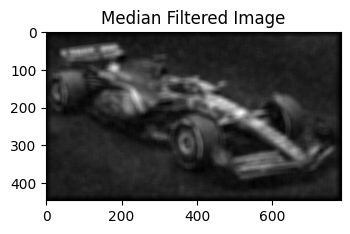

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


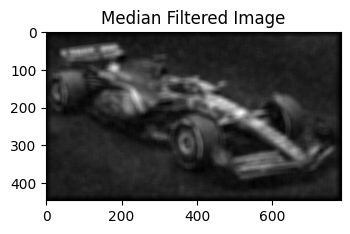

[[0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.

In [67]:
mean_kernel = np.full((15, 15), 1)
mm_filtered_image = signal.convolve(image, mean_kernel, mode='full')
mean_kernel2 = np.full((15, 15), 1/(15*15))
mm_filtered_image2 = signal.convolve(image, mean_kernel2, mode='full')
#===============================

plt.subplot(2,1,1)
plt.imshow(mm_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.show()
print(mean_kernel)
plt.subplot(2,1,2)
plt.imshow(mm_filtered_image2, cmap='gray')
plt.title('Median Filtered Image')
plt.show()
print(mean_kernel2)

# difference = cv2.subtract(mm_filtered_image, mm_filtered_image2)
# print(difference)
# plt.imshow(difference, cmap='gray')